In [80]:

from scipy import stats

import matplotlib.pyplot as plt
import numpy as np

import numpy.random as rd

import pandas as pd 


In [81]:
# うまく行った場合のガンマ分布の乱数

arr = np.random.gamma(lam, 1/alpha, 10)
print(arr)

[ 0.07506926  0.40725806  0.48258794  0.53059725  0.57835873  0.50589376
  0.08341707  0.48156484  0.37140298  0.86134166]


# 確率分布の定義

In [82]:
def h(x, lam, alpha):
    return lam * x- (alpha-1)*np.log(x)

In [83]:
def delta_h(x, lam, alpha):
    return lam - (alpha - 1)/x

In [84]:
def hamiltonian(x,lam, alpha,p):
    return h(x, lam, alpha) + 0.5 * p**2
       

In [85]:
def leap_flog_step1(p, eta,x,lam, alpha):
    return p - 0.5*eta* delta_h(x, lam, alpha)

def leap_flog_step2(p, x, eta):
    return x + eta * p


In [86]:
def move_one_step(x,lam, alpha, p, eta, L=100, stlide=1):
    """
    リープフロッグ法でL回移動した１ステップを実行
    """
    ret = []
    ret.append([1, p, x, hamiltonian(x,lam, alpha,p)])
    for _ in range(L):
        p = leap_flog_step1(p, eta,x,lam, alpha)
        x = leap_flog_step2(p, x, eta)
        p = leap_flog_step1(p, eta,x,lam, alpha)
        ret.append([1, p, x, hamiltonian(x,lam, alpha,p)])
    return ret[::stlide]

In [87]:

# initial param
x = 0.1

p = 0
eta = 0.01
L = 200
#T = 100

result = move_one_step(x,lam, alpha, p, eta, L=200, stlide=1)

In [88]:
result = np.array(result)
#HTML(pd.DataFrame(result, columns="p,x,hamiltonian".split(",")).to_html())
# type=1はリープフロッグ法による遷移を表す
pd.DataFrame(result, columns="type,p,x,hamiltonian".split(","))

,type,p,x,hamiltonian
0,1.0,0.000000,0.100000,9.510340
1,1.0,0.366367,0.101850,9.509679
2,1.0,0.719080,0.107327,9.508008
3,1.0,1.047496,0.116232,9.506001
4,1.0,1.345479,0.128277,9.504233
5,1.0,1.611113,0.143141,9.502962
6,1.0,1.845446,0.160500,9.502192
7,1.0,2.051138,0.180050,9.501813
8,1.0,2.231462,0.201522,9.501700
9,1.0,2.389723,0.224679,9.501749


In [89]:
# HMC simulation
rd.seed(71)
scale_p = 1

# initial param
x = 2.5
p = rd.normal(loc=0,scale=scale_p)
eps = 0.01
L = 100
T = 10000
sim_result = []
prev_hamiltonian = hamiltonian(x,lam, alpha,p)
sim_result.append([ p, x, prev_hamiltonian, True])
for t in range(T):
    prev_p = p
    prev_x = x
    prev_hamiltonian = hamiltonian(x,lam, alpha,p)
    for i in range(L):
        p = leap_flog_step1(p, eta,x,lam, alpha)
        x = leap_flog_step2(p, x, eta)
        p = leap_flog_step1(p, eta,x,lam, alpha)
        

    H = hamiltonian(x,lam, alpha,p)
    r = np.exp(prev_hamiltonian-H)
    if  r > 1:
        sim_result.append([ p, x, hamiltonian(x,lam, alpha,p), True])
    elif r > 0 and rd.uniform() < r:
        sim_result.append([ p, x,hamiltonian(x,lam, alpha,p), True])
    else:
        sim_result.append([ p, x, hamiltonian(x,lam, alpha,p), False])
        x = prev_x
    
    p = rd.normal(loc=0,scale=scale_p)
    
sim_result = np.array(sim_result)
df = pd.DataFrame(sim_result, columns="p,x,hamiltonian,accept".split(","))

In [90]:
df

,p,x,hamiltonian,accept
0,-0.430603,2.500000,3.927547,1.0
1,-1.455158,1.469333,3.927507,1.0
2,0.259927,0.692328,3.581546,1.0
3,1.135994,1.907293,3.784381,1.0
4,-0.264559,2.245742,3.536078,1.0
5,-1.227034,1.304908,3.603000,1.0
6,0.166380,1.744858,3.021722,1.0
7,-0.612310,1.026870,3.162011,1.0
8,0.502563,1.543103,3.020413,1.0
9,-0.055063,0.743367,3.417878,1.0


In [91]:
# parameter
lam =3
alpha = 5

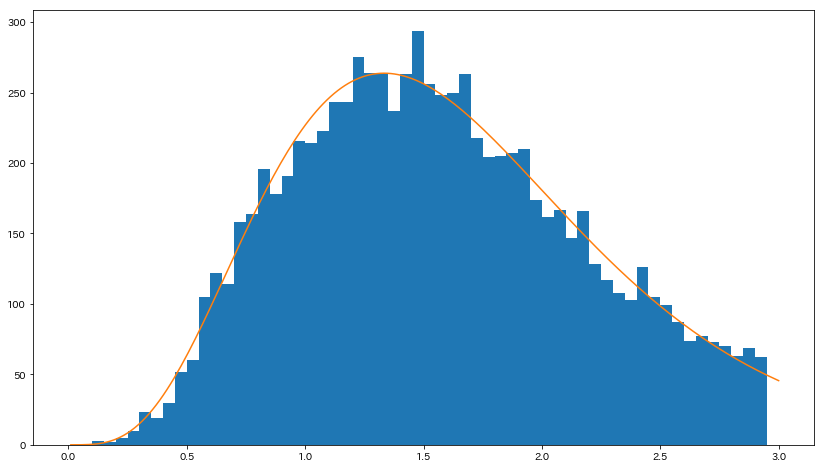

In [92]:
burn_in = int(T*0.1)
w = 0.05
n = len(sim_result[burn_in:])

xx = np.linspace(0.01, 3, 200)
plt.figure(figsize=(14,8))
plt.hist(sim_result[burn_in:,1], bins=np.arange(0,3,w))
plt.plot(xx, stats.gamma.pdf(xx, alpha, 0, 1/lam)*w*n)